In [23]:
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('NBA PMV by Team - League Data.csv')
df.head()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,DBPM,BPM,VORP,MPG,WS/Season,DWS/Season,G/82,PlayerSalary,PMV,EPP
0,23,1605,30.1,0.619,0.088,0.500,7.4,25.4,16.4,23.3,...,1.6,7.3,3.8,37.325581,14.829787,3.489362,75.021277,22471910.0,0.38,0.15
1,28,1433,29.6,0.618,0.504,0.473,1.5,13.7,7.6,45.4,...,0.3,9.9,4.3,35.825000,15.004255,3.140426,69.787234,28299399.0,0.37,0.08
2,24,1525,28.3,0.630,0.103,0.449,8.1,23.6,16.1,11.6,...,1.4,4.7,2.6,36.309524,13.495833,3.587500,71.750000,23775506.0,0.35,0.11
3,33,1738,28.4,0.628,0.257,0.322,3.6,20.1,12.0,43.1,...,2.0,9.0,4.9,36.978723,13.259574,2.965957,82.000000,33285709.0,0.34,0.00
4,22,1844,24.0,0.633,0.263,0.315,9.5,30.8,20.0,10.2,...,1.2,5.0,3.3,35.461538,12.930769,3.626923,82.000000,6216840.0,0.32,0.26


In [25]:
df = df.loc[df.MP >= 985]

In [26]:
df.columns = df.columns.str.strip()
df.drop(['PMV','EPP'], axis=1, inplace=True)
df.head()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,WS/48,OBPM,DBPM,BPM,VORP,MPG,WS/Season,DWS/Season,G/82,PlayerSalary
0,23,1605,30.1,0.619,0.088,0.500,7.4,25.4,16.4,23.3,...,0.253,5.7,1.6,7.3,3.8,37.325581,14.829787,3.489362,75.021277,22471910.0
1,28,1433,29.6,0.618,0.504,0.473,1.5,13.7,7.6,45.4,...,0.287,9.6,0.3,9.9,4.3,35.825000,15.004255,3.140426,69.787234,28299399.0
2,24,1525,28.3,0.630,0.103,0.449,8.1,23.6,16.1,11.6,...,0.248,3.3,1.4,4.7,2.6,36.309524,13.495833,3.587500,71.750000,23775506.0
3,33,1738,28.4,0.628,0.257,0.322,3.6,20.1,12.0,43.1,...,0.211,7.0,2.0,9.0,4.9,36.978723,13.259574,2.965957,82.000000,33285709.0
4,22,1844,24.0,0.633,0.263,0.315,9.5,30.8,20.0,10.2,...,0.214,3.8,1.2,5.0,3.3,35.461538,12.930769,3.626923,82.000000,6216840.0


In [27]:
from sklearn.model_selection import train_test_split

xprep = df.drop('PlayerSalary', axis=1)

x_train, x_cv, y_train, y_cv = train_test_split(xprep, df.PlayerSalary, test_size =0.3)

In [28]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train,y_train)
r2 = lreg.score(x_cv,y_cv)
n=x_train.shape[0]
p=x_train.shape[1]
adjR2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjR2)
print(r2)

0.31736031559967126
0.4716962442467021


AxesSubplot(0.125,0.125;0.775x0.755)


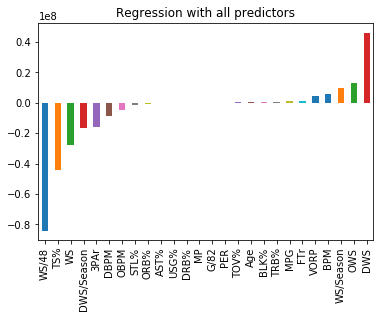

In [29]:
predictors = x_train.columns
coef = Series(data=lreg.coef_, index=predictors).sort_values()
print (coef.plot(kind='bar', title='Regression with all predictors'))

Training RMSEA: 5045154.69071854
Testing RMSEA: 6723608.280065202
difference = 1678453.5893466622


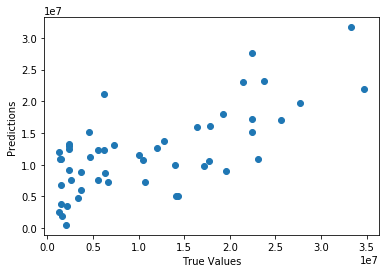

In [30]:
predictions = lreg.predict(x_train)
mse = np.mean((predictions - y_train)**2)
tr=np.sqrt(mse)
print("Training RMSEA: "+str(tr))

predictions = lreg.predict(x_cv)
mse = np.mean((predictions - y_cv)**2)
ts=np.sqrt(mse)
print("Testing RMSEA: "+str(ts))
print("difference = "+str(ts-tr))

plt.scatter(y_cv, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


In [31]:
from sklearn.linear_model import ElasticNet
alpha=1
ratio=1
ENreg = ElasticNet(alpha=alpha, l1_ratio=ratio)
ENreg.fit(x_train,y_train)

r2 = ENreg.score(x_cv,y_cv)
n=x_train.shape[0]
p=x_train.shape[1]
adjR2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjR2)

0.2905938566346604


C:\Users\Y\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


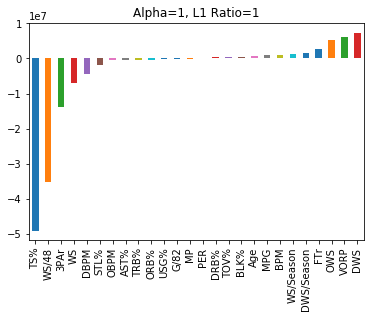

In [32]:
predictors = x_train.columns
coef = Series(ENreg.coef_,predictors).sort_values()
coef=coef[coef!=0]
print(coef.plot(kind='bar', title='Alpha='+str(alpha)+', L1 Ratio='+str(ratio)))